In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


## Parameters

In [2]:
use_clusters = [
    'CA1_Ak5', 'CA1_Chrm3', 'CA1_Kif26a', 'CA1_Ptprg',
    'CA3_Cadm2', 'CA3_Efnb2', 'CA3-St18_Epha5', 'CA3-St18_Nuak1',
    'CA3-St18_Tead1', 'DG_dg-all', 'DG-po_Bcl11a', 'DG-po_Calb2',
    'DG-po_Kctd8', 'Gfra1_Gfra1', 'IG-CA2_Chrm3', 'IG-CA2_Peak1', 'IG-CA2_Xpr1'
]
# 'CA1_Lingo2' not include, because it co-cluster with RHP, probably an incomplete cluster

auroc_cutoff = 0.9
fc_cutoff = 2
delta_cutoff = 0.01
rate_to_min = 0.01
rate_from_max = 0.01
n_repeat_pairs = 5

In [3]:
use_clusters = [i.replace('_', ' ') for i in use_clusters]
use_clusters = set(use_clusters)

In [4]:
subtype_rate = xr.open_dataset(
    '/home/hanliu/project/mouse_rostral_brain/study/mCClustermCLevel/SubType.geneslop2k.mcds'
)['gene_cluster_da_rate'].sel(mc_type='CHN').to_pandas()
subtype_rate.index = subtype_rate.index.map(lambda i: i.replace('_', ' '))
subtype_rate.head()

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1849: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  3: pd.Panel}


geneslop2k,ENSMUSG00000102693.1,ENSMUSG00000064842.1,ENSMUSG00000051951.5,ENSMUSG00000102851.1,ENSMUSG00000103377.1,ENSMUSG00000104017.1,ENSMUSG00000103025.1,ENSMUSG00000089699.1,ENSMUSG00000103201.1,ENSMUSG00000103147.1,...,ENSMUSG00000064363.1,ENSMUSG00000064364.1,ENSMUSG00000064365.1,ENSMUSG00000064366.1,ENSMUSG00000064367.1,ENSMUSG00000064368.1,ENSMUSG00000064369.1,ENSMUSG00000064370.1,ENSMUSG00000064371.1,ENSMUSG00000064372.1
SubType,,,,,,,,,,,,,,,,,,,,,
MGE-Sst Rxra,0.036028,0.043546,0.011518,0.012793,0.008664,0.013207,0.013343,0.012206,0.012409,0.012589,...,0.032261,0.032288,0.032410,0.032552,0.034254,0.033398,0.033502,0.033819,0.035191,0.035211
CA3 Cadm2,0.033156,0.029851,0.009630,0.008696,0.009502,0.010312,0.009555,0.009374,0.009898,0.008947,...,0.025086,0.025137,0.025251,0.025495,0.024930,0.024434,0.024452,0.024956,0.024893,0.024863
CA1 Chrm3,0.023127,0.024722,0.008233,0.008266,0.009479,0.012860,0.007963,0.008021,0.009220,0.007640,...,0.033007,0.032922,0.032910,0.033188,0.031894,0.030501,0.029690,0.029887,0.029790,0.029634
CA3-St18 Tead1,0.027134,0.027768,0.017092,0.013822,0.024804,0.040937,0.015322,0.014494,0.019728,0.011044,...,0.034665,0.034462,0.034645,0.034727,0.033429,0.031014,0.029844,0.029497,0.029236,0.029461
Unc5c Unc5c,0.024149,0.030352,0.011801,0.010621,0.010696,0.014942,0.021727,0.013943,0.014074,0.009287,...,0.032325,0.032111,0.031888,0.031687,0.029979,0.029032,0.028236,0.028392,0.025932,0.026097


## Total DMG results

In [5]:
total_dmg = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusterMethylMarker/SubTypePairwiseDEG/TotalPairwiseMarker.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
use_dmg = total_dmg[total_dmg['cluster_from'].isin(use_clusters) & 
                    total_dmg['cluster_to'].isin(use_clusters) & 
                    (total_dmg['AUROC'] > auroc_cutoff)]
use_dmg['rate_from'] = use_dmg.apply(lambda i: subtype_rate.at[i['cluster_from'], i['gene_id']], axis=1)
use_dmg['rate_to'] = use_dmg.apply(lambda i: subtype_rate.at[i['cluster_to'], i['gene_id']], axis=1)

gene_counts = use_dmg['gene_name'].value_counts()

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
fc = use_dmg['rate_to'] / use_dmg['rate_from']
delta = use_dmg['rate_to'] - use_dmg['rate_from']
use_dmg = use_dmg[(fc > fc_cutoff) & 
                  (delta > delta_cutoff) &
                  (use_dmg['rate_to'] > rate_to_min) & 
                  (use_dmg['rate_from'] < rate_from_max)]

In [8]:
repeat_counts = use_dmg['gene_id'].value_counts()
use_genes = repeat_counts[repeat_counts > n_repeat_pairs].index
use_dmg = use_dmg[use_dmg['gene_id'].isin(use_genes)]

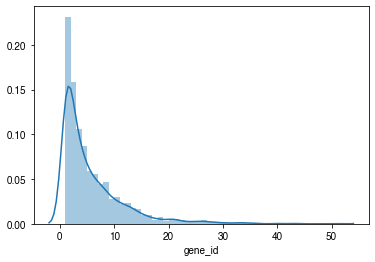

In [10]:
sns.distplot(repeat_counts)

In [11]:
use_dmg.to_msgpack('RelatedDMG.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  """Entry point for launching an IPython kernel.


In [12]:
with open('related_dmgs.txt', 'w') as f:
    for g in use_dmg['gene_id'].unique():
        f.write(g + '\n')

In [15]:
use_dmg.shape

In [ ]:
use_dmg['gene_id'].value_counts().describe()